## Neural Network
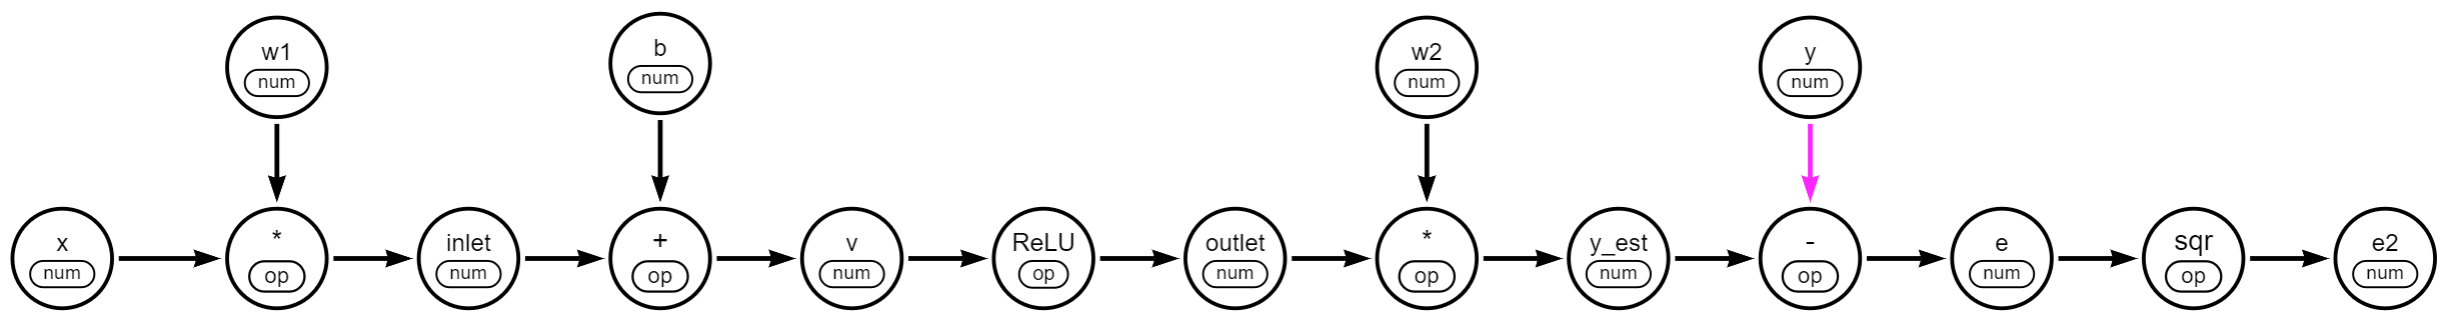

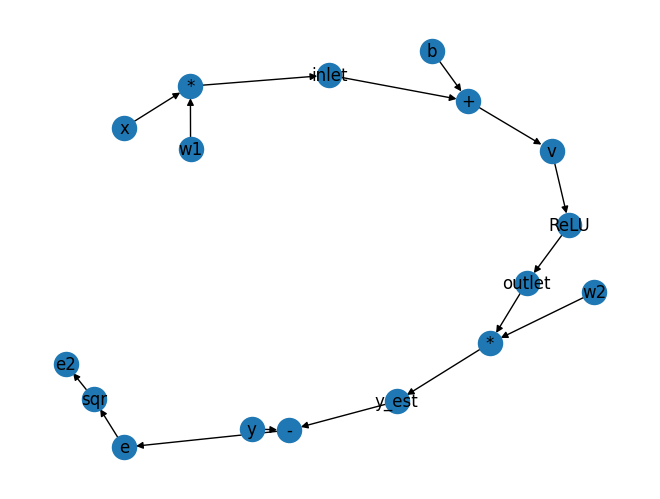

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../trengx')
import engine as te

# Create a directed graph
G = nx.DiGraph()

n= te.Neuron(G)
inlet, b, v, outlet = n.get_nodes()
x, w1, _, inlet = te.op2(G, in1_name = 'x', in2_name = 'w1', op_name = '*', out_id = inlet)
_, w2, _, y_est = te.op2(G, in1_id=outlet, in2_name = 'w2', op_name = '*', out_name = 'y_est')
y, _, _, e = te.op2(G, in1_name = 'y', in2_id=y_est,  op_name = '-', out_name = 'e')
_, _, e2 = te.op1(G, in_id=e, op_name='sqr', out_name='e2')

# Create a mapping for the labels
labels = {node[0]: node[1]['name'] for node in G.nodes(data=True)}

# Draw the graph
nx.draw(G, labels=labels, with_labels=True)

plt.show()


In [13]:
G.nodes[w1]['value'] = 0.01
G.nodes[b]['value'] = 0.01
G.nodes[w2]['value'] = 0.01
G.nodes[y]['value'] = 2


print("x1 value: ", G.nodes[x]['value'])
print("w1 value: ", G.nodes[w1]['value'])
print("inlet value: ", G.nodes[inlet]['value'])
print("b value: ", G.nodes[b]['value'])
print("v value: ", G.nodes[v]['value'])
print("outlet value: ", G.nodes[outlet]['value'])
print("w2 value: ", G.nodes[w2]['value'])
print("y_est value: ", G.nodes[y_est]['value'])
print("y value: ", G.nodes[y]['value'])
print("e value: ", G.nodes[e]['value'])
print("e2 value: ", G.nodes[e2]['value'])


x1 value:  None
w1 value:  0.01
inlet value:  None
b value:  0.01
v value:  None
outlet value:  None
w2 value:  0.01
y_est value:  None
y value:  2
e value:  None
e2 value:  None


In [14]:

'''
te.forward_propagate(G, x, 1)  # Set x=1

print("x value: ", G.nodes[x]['value'])
print("w1 value: ", G.nodes[w1]['value'])
print("inlet value: ", G.nodes[inlet]['value'])
print("b value: ", G.nodes[b]['value'])
print("v value: ", G.nodes[v]['value'])
print("outlet value: ", G.nodes[outlet]['value'])
print("w2 value: ", G.nodes[w2]['value'])
print("y_est value: ", G.nodes[y_est]['value'])
print("y value: ", G.nodes[y]['value'])
print("e value: ", G.nodes[e]['value'])
print("e2 value: ", G.nodes[e2]['value'])
print("")

te.backward_propagate(G, e2, 0.01)

print("w2 grad: ", G.nodes[w2]['grad'])
print("w2 value: ", G.nodes[w2]['value'])
print("b grad: ", G.nodes[b]['grad'])
print("b grad: ", G.nodes[b]['value'])
print("w1 grad: ", G.nodes[w1]['grad'])
print("w1 value: ", G.nodes[w1]['value'])
'''


'\nte.forward_propagate(G, x, 1)  # Set x=1\n\nprint("x value: ", G.nodes[x][\'value\'])\nprint("w1 value: ", G.nodes[w1][\'value\'])\nprint("inlet value: ", G.nodes[inlet][\'value\'])\nprint("b value: ", G.nodes[b][\'value\'])\nprint("v value: ", G.nodes[v][\'value\'])\nprint("outlet value: ", G.nodes[outlet][\'value\'])\nprint("w2 value: ", G.nodes[w2][\'value\'])\nprint("y_est value: ", G.nodes[y_est][\'value\'])\nprint("y value: ", G.nodes[y][\'value\'])\nprint("e value: ", G.nodes[e][\'value\'])\nprint("e2 value: ", G.nodes[e2][\'value\'])\nprint("")\n\nte.backward_propagate(G, e2, 0.01)\n\nprint("w2 grad: ", G.nodes[w2][\'grad\'])\nprint("w2 value: ", G.nodes[w2][\'value\'])\nprint("b grad: ", G.nodes[b][\'grad\'])\nprint("b grad: ", G.nodes[b][\'value\'])\nprint("w1 grad: ", G.nodes[w1][\'grad\'])\nprint("w1 value: ", G.nodes[w1][\'value\'])\n'

Execution time: 0.18708252906799316 seconds


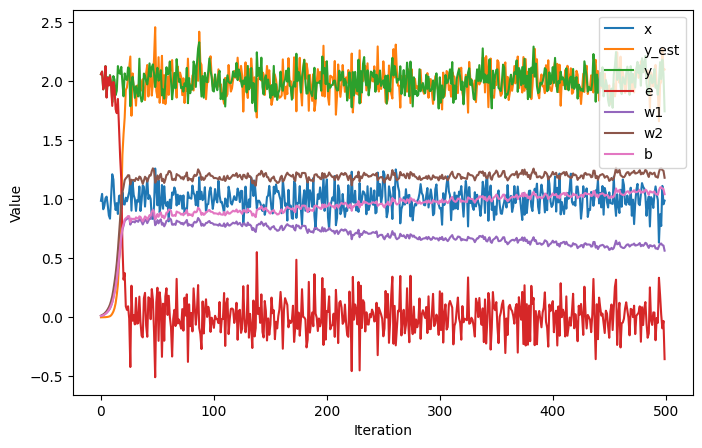

In [31]:
import matplotlib.pyplot as plt
import time

# Variables for the neuron
G.nodes[w1]['value'] = 0.01
G.nodes[b]['value'] = 0.01
G.nodes[w2]['value'] = 0.01
G.nodes[y]['value'] = 2

# Arrays to store the values of y_est, y and e
x_values = []
y_est_values = []
y_values = []
e_values = []
w1_values = []
w2_values = []
b_values = []

N = 500  # Number of iterations
lr = 0.05 # Learning rate

start_time = time.time()  # Start timing
for i in range(N):
    noise_x = np.random.normal(0, 0.1)  # Generate noise for x with mean=0 and standard deviation=0.1
    noise_y = np.random.normal(0, 0.1)  # Generate noise for y with mean=0 and standard deviation=0.1
    G.nodes[x]['value'] = 1 + noise_x  # Add noise to x
    G.nodes[y]['value'] = 2 + noise_y  # Add noise to y
    te.forward_propagate(G, x, G.nodes[x]['value'])  # forward propagate with input x
    te.backward_propagate(G, e2, lr)  # backward propagate from node e2

    # Append current values to lists
    x_values.append(G.nodes[x]['value'])
    y_est_values.append(G.nodes[y_est]['value'])
    y_values.append(G.nodes[y]['value'])
    e_values.append(G.nodes[e]['value'])
    w1_values.append(G.nodes[w1]['value'])
    w2_values.append(G.nodes[w2]['value'])
    b_values.append(G.nodes[b]['value'])
    
end_time = time.time()  # End timing
execution_time = end_time - start_time  # Calculate execution time
print(f"Execution time: {execution_time} seconds")

# Plotting
plt.figure(figsize=(8, 5))

plt.plot(range(N), x_values, label='x')
plt.plot(range(N), y_est_values, label='y_est')
plt.plot(range(N), y_values, label='y')
plt.plot(range(N), e_values, label='e')
plt.plot(range(N), w1_values, label='w1')
plt.plot(range(N), w2_values, label='w2')
plt.plot(range(N), b_values, label='b')

plt.xlabel('Iteration')
plt.ylabel('Value')

plt.legend(loc='upper right')  
plt.show()

